## For report
### 가설검증

1. 정규분포 만들기!

In [ ]:
## 평균
x_list = [2, 4, 6, 1, 5, 7, 9, 8, 3]

n = len(x_list)
sum_x = 0
for x in x_list:
    sum_x += x
mean_x = sum_x/n
print(mean_x)

5.0


In [ ]:
def mean(x_list):
    """
    리스트 x_list 원소의 평균 구하기
    입력값: 리스트 x_list
    출력값: 평균 res
    """
    n = len(x_list)
    sum_x = 0
    for x in x_list:
        sum_x += x
    res = sum_x/n
    return res

In [ ]:
x_list = [2, 4, 6, 1, 5, 7, 9, 8, 3]

res = mean(x_list)
print(res)

5.0


In [ ]:
## 라이브러리
import numpy as np

x_list = [2, 4, 6, 1, 5, 7, 9, 8, 3]
mean_x = np.mean(x_list)
print(mean_x)

5.0


In [ ]:
## 분산
def var(x_list):
    """
    리스트 x_list 원소의 분산 구하기
    입력값: 리스트 x_list
    출력값: 분산 res
    """
    n = len(x_list)
    mean_x = mean(x_list)
    ss_x = 0

    for x in x_list:
        ss_x += (x-mean_x)**2

    res = ss_x/(n-1)
    return res

def std(x_list):
    """
    리스트 x_list 원소의 표준 편차 구하기
    입력값: 리스트 x_list
    출력값: 표준 편차 res
    """
    var_x = var(x_list)
    res = var_x**0.5
    return res

In [ ]:
var_x = var(x_list)
std_x = std(x_list)
print(var_x)
print(std_x)

7.5
2.7386127875258306


In [ ]:
## 라이브러리
var_x = np.var(x_list, ddof=1)
std_x = np.std(x_list, ddof=1)
print(var_x)
print(std_x)

7.5
2.7386127875258306


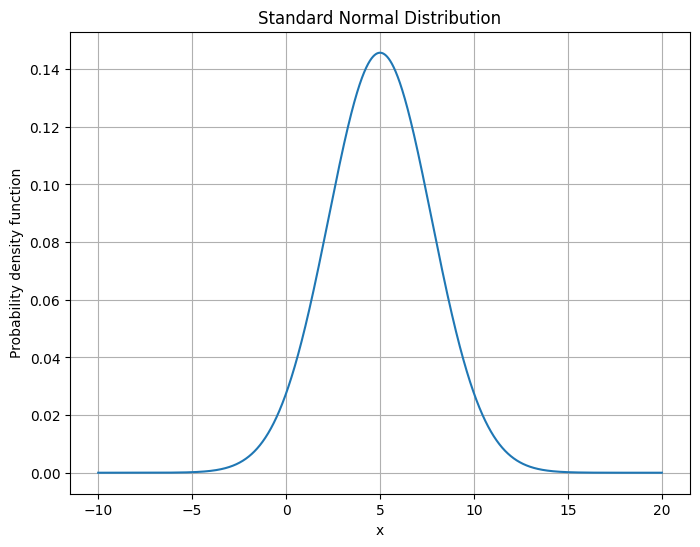

In [ ]:
## 정규분포 그리기
from scipy import stats
import matplotlib.pyplot as plt

x = np.arange(-10, 20, 0.001)
plt.figure(figsize=(8,6))
plt.title('Standard Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability density function')
plt.grid()
plt.plot(x, stats.norm.pdf(x, loc=mean_x, scale=std_x))
plt.show()

## 예시
### 데이터: 피마인디언 당뇨병 데이터
### 대립가설: bmi는 당뇨환자와 정상을 구분하는데 의미가 있다.
### 귀무가설: bmi는 당뇨환자와 정상을 구분하는데 의미가 없다.
#### 출처: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

#### 데이터의 유형은 무엇인가?
#### 데이터 표본의 수는 어떤가?

In [ ]:
import pandas as pd
## https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
## 깃허브에서 데이터를 불러옵니다.
!git clone https://github.com/taehojo/data.git

# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
data_set = pd.read_csv('./data/pima-indians-diabetes3.csv')
data_set

fatal: destination path 'data' already exists and is not an empty directory.


,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
## 데이터를 나누어서 지정합니다.
diabete = data_set[data_set['diabetes']==1]      #당뇨
normal = data_set[data_set['diabetes']==0]       #정상
diabete

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [ ]:
key = 'bmi'
d_samples = diabete[key]
n_samples = normal[key]
d_samples

0      33.6
2      23.3
4      43.1
6      31.0
8      30.5
       ... 
755    36.5
757    36.3
759    35.5
761    44.0
766    30.1
Name: bmi, Length: 268, dtype: float64

In [ ]:
mu1 = np.mean(d_samples)
mu2 = np.mean(n_samples)

std1 = np.std(d_samples)
std2 = np.std(n_samples)

print('Diabete 샘플의 표본평균:',mu1, '표본분산:',std1,'\n')
print('Normal 샘플의 표본평균:',mu2, '표본분산:',std2)

Diabete 샘플의 표본평균: 35.14253731343284 표본분산: 7.249404266473001 

Normal 샘플의 표본평균: 30.3042 표본분산: 7.68216130786122


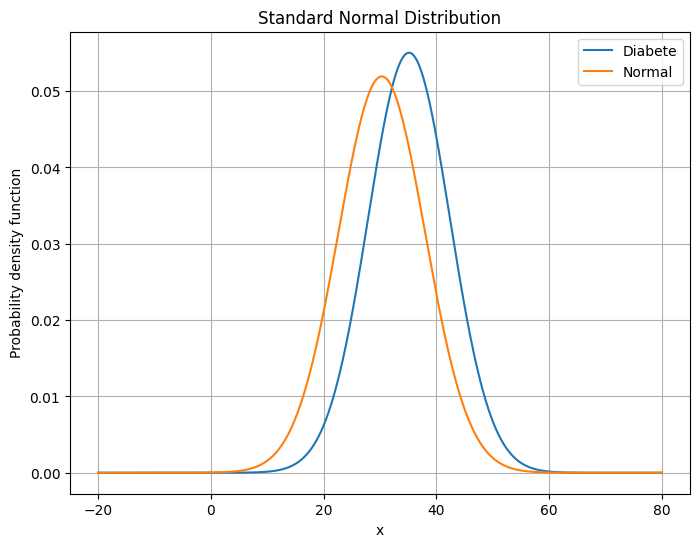

In [ ]:
## 정규성과 등분산성을 정규분포로 확인
x = np.arange(-20, 80, 0.001)
plt.figure(figsize=(8,6))
plt.title('Standard Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability density function')
plt.grid()
plt.plot(x, stats.norm.pdf(x, loc=mu1, scale=std1), label='Diabete')
plt.plot(x, stats.norm.pdf(x, loc=mu2, scale=std2), label='Normal')
plt.legend()
plt.show()

In [ ]:
## 정규성도 존재하고 등분산성도 존재
## 따라서 t-test로 가설 검
result = stats.ttest_ind(d_samples, n_samples, equal_var = True)
print(result)

TtestResult(statistic=8.47183994786525, pvalue=1.2298074873116022e-16, df=766.0)


In [ ]:
## p-value와 유의수준(0.05)
tvalue,pvalue = result[0],result[1]
print('두 그룹에서',key,'에 대한 \nt-value(표본의 실제값):',tvalue,'\np-value:',round(pvalue, 5))
print()

sp = 0.05
if pvalue < sp:
  print(key,'는 두 그룹에 대한 구분에 유의미합니다.')
else:
  print(key,'는 두 그룹에 대한 구분에 유의미 하지 않습니다.')

두 그룹에서 bmi 에 대한 
t-value(표본의 실제값): 8.47183994786525 
p-value: 0.0

bmi 는 두 그룹에 대한 구분에 유의미합니다.
